In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import ListedColormap


white="white"
orange="#ffcc99"
light_pink="#ffcccc"
light_red="#ff9999"
red="#ff0000"
pink="#ffcccc"
grey="#808080"
black="#000000"

In [ ]:

output=Path("/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2")
#adj_bmp='/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/adjacencyMatrix.miic.orientProba.bmp.txt'
wnt_summary='/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/edgesList.miic.summary_wnt.txt'
bmp_summary='/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/edgesList.miic.summary_bmp.txt'


In [ ]:

def create_MI_adjacency_matrix(summary_path):
    """
    Creates an adjacency matrix from the DataFrame.
    """ 
    df = pd.read_csv(summary_path, sep="\t", index_col=0, header=0)

    df=df[["x","y","info_bits"]]

    # List of all unique nodes, sorted alphabetically
    nodes = sorted(pd.unique(df[['x', 'y']].values.ravel()))

    # Create an empty adjacency matrix
    adj_matrix = pd.DataFrame(np.zeros((len(nodes), len(nodes))), columns=nodes, index=nodes)

    for i in range(len(df)):
        x = df.iloc[i]['x']
        y = df.iloc[i]['y']
        info_bits = df.iloc[i]['info_bits']

        # Set the value in the adjacency matrix
        adj_matrix.at[x, y] = info_bits
        adj_matrix.at[y, x] = info_bits  # Assuming undirected graph

    return adj_matrix









In [6]:
adj_wnt_df=create_MI_adjacency_matrix(wnt_summary)
adj_bmp_df=create_MI_adjacency_matrix(bmp_summary)

In [36]:
# intersecting the two dataframes
# NOTE : because adj is a symmetric matrix, we can use the columns or the index to get the intersection
node_intersection = adj_bmp_df.columns.intersection(adj_wnt_df.columns) 
# keeping only the columns that are in both dataframes
adj_bmp_df_common = adj_bmp_df[node_intersection]
# keeping the rows that are in both dataframes
adj_bmp_df_common = adj_bmp_df_common[ adj_bmp_df_common.index.isin(node_intersection)]

# keeping only the columns that are in both dataframes
adj_wnt_df_common = adj_wnt_df[node_intersection]
# keeping the rows that are in both dataframes
adj_wnt_df_common = adj_wnt_df_common[ adj_wnt_df_common.index.isin(node_intersection)]


/var/folders/75/35r72_cx7h71d1114xgc6qv40000gn/T/ipykernel_87023/554045074.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(adj_bmp_df, method='average')


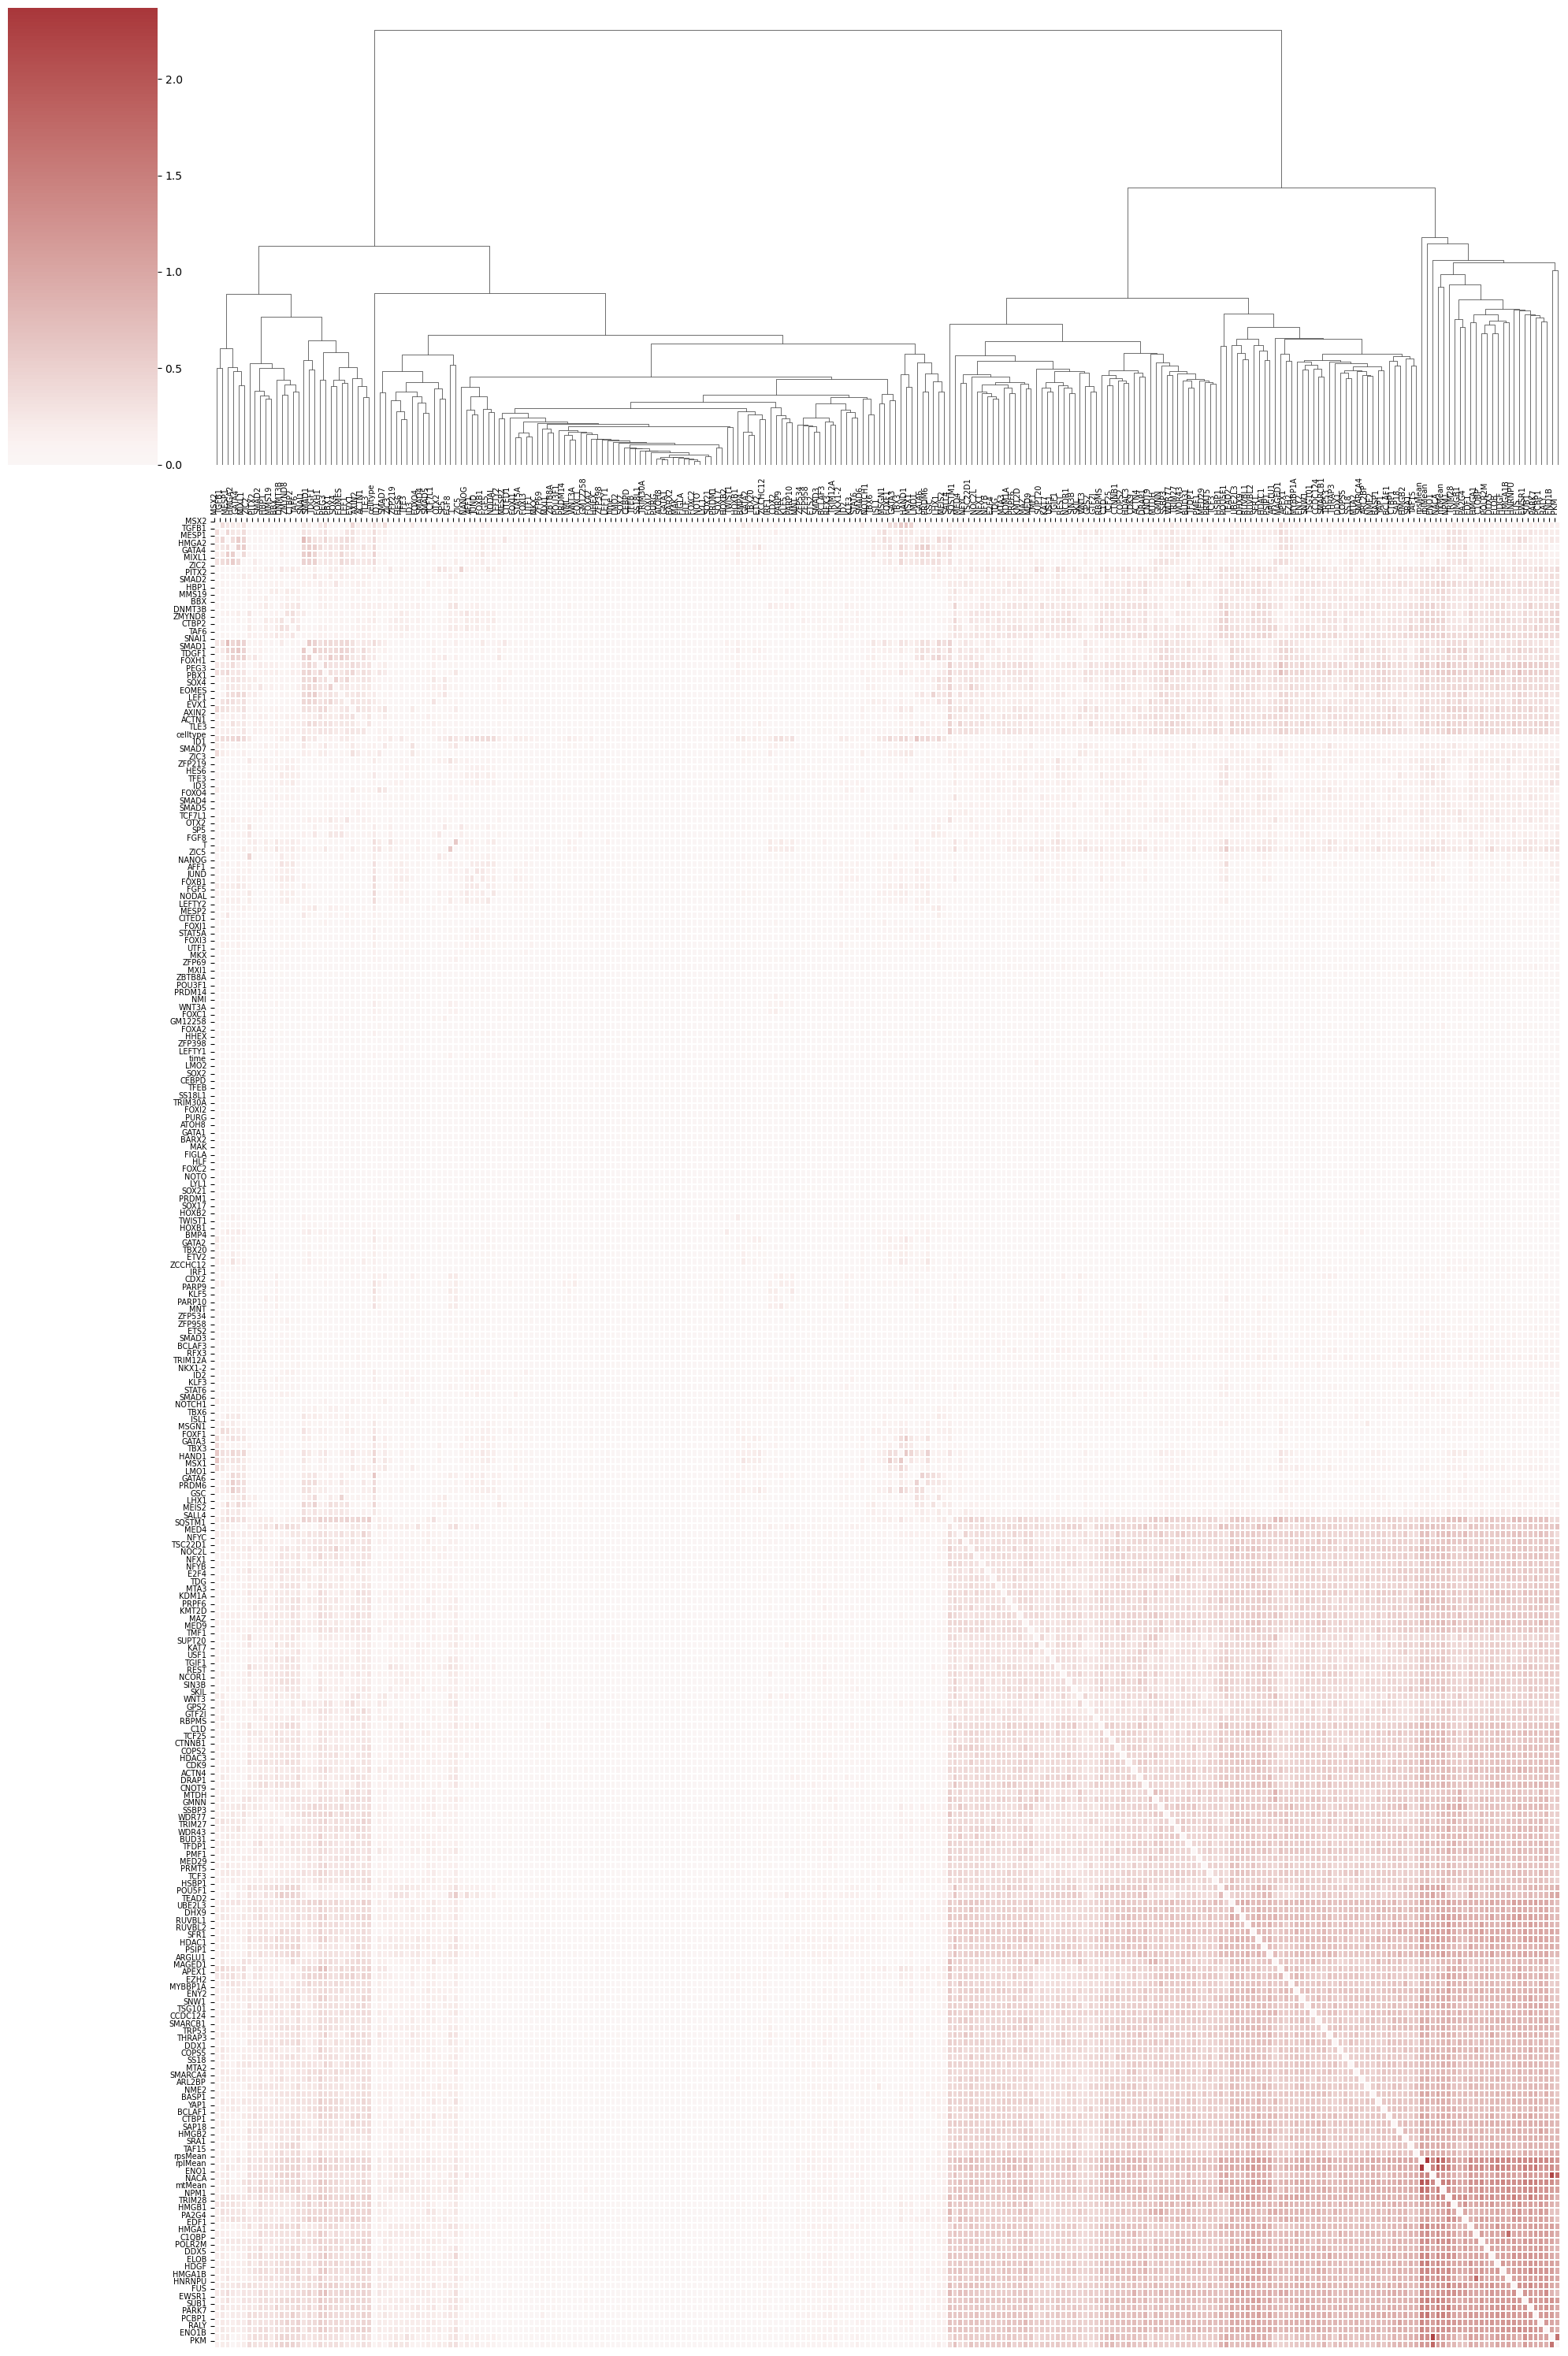

In [7]:
import numpy as np
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(adj_bmp_df, method='average')

# linkage to make sure the clustering was done equially on both axes 
# Symmetry is preserved visually,

g_bmp = sns.clustermap(adj_bmp_df,
                   center=0.001,
                   row_linkage=linkage,
                   col_linkage=linkage,
                   cmap="vlag",
                   dendrogram_ratio=(0.1, 0.2),
                   linewidths=.1,
                   figsize=(20, 30))

# Move x-axis labels to the top
g_bmp.ax_heatmap.xaxis.set_ticks_position("top")
g_bmp.ax_heatmap.xaxis.set_label_position("top")

# Get all column names from the data (regardless of what gets shown in the plot)
column_names = g_bmp.data2d.columns
row_names = g_bmp.data2d.index

# Set xtick labels manually to ensure all labels are shown
g_bmp.ax_heatmap.set_xticks(np.arange(len(column_names)))  # Ensure every column is listed
g_bmp.ax_heatmap.set_xticklabels(column_names, rotation=90, fontsize=7)

# Set yticks to the row names
g_bmp.ax_heatmap.yaxis.set_label_position("left")
g_bmp.ax_heatmap.yaxis.set_ticks_position("left")

# Set xtick labels manually to ensure all labels are shown
g_bmp.ax_heatmap.set_yticks(np.arange(len(row_names)))  # Ensure every column is listed
g_bmp.ax_heatmap.set_yticklabels(row_names, fontsize=7)

g_bmp.ax_row_dendrogram.remove()

# Optional: Adjust layout for proper spacing
plt.tight_layout()
plt.show()

# save the plot
# Save the heatmap as a PNG file
g_bmp.savefig(output /"bmp_heatmap.png", dpi=300) 




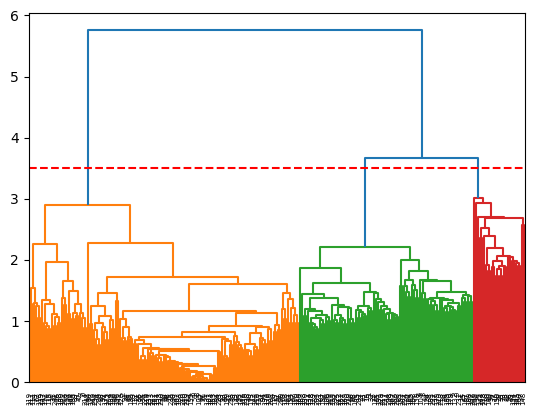

1    135
2     87
3     26
Name: count, dtype: int64

In [123]:
linkage=g_bmp.dendrogram_col.linkage
threshold=3.5
sch.dendrogram(linkage, color_threshold=threshold)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

clusters = sch.fcluster(linkage, threshold, criterion='distance')
bmp_gene_clusters=pd.Series(clusters,index=adj_bmp_df.columns)
bmp_gene_clusters.value_counts()

/var/folders/75/35r72_cx7h71d1114xgc6qv40000gn/T/ipykernel_87023/4156675184.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(adj_wnt_df, method='average')


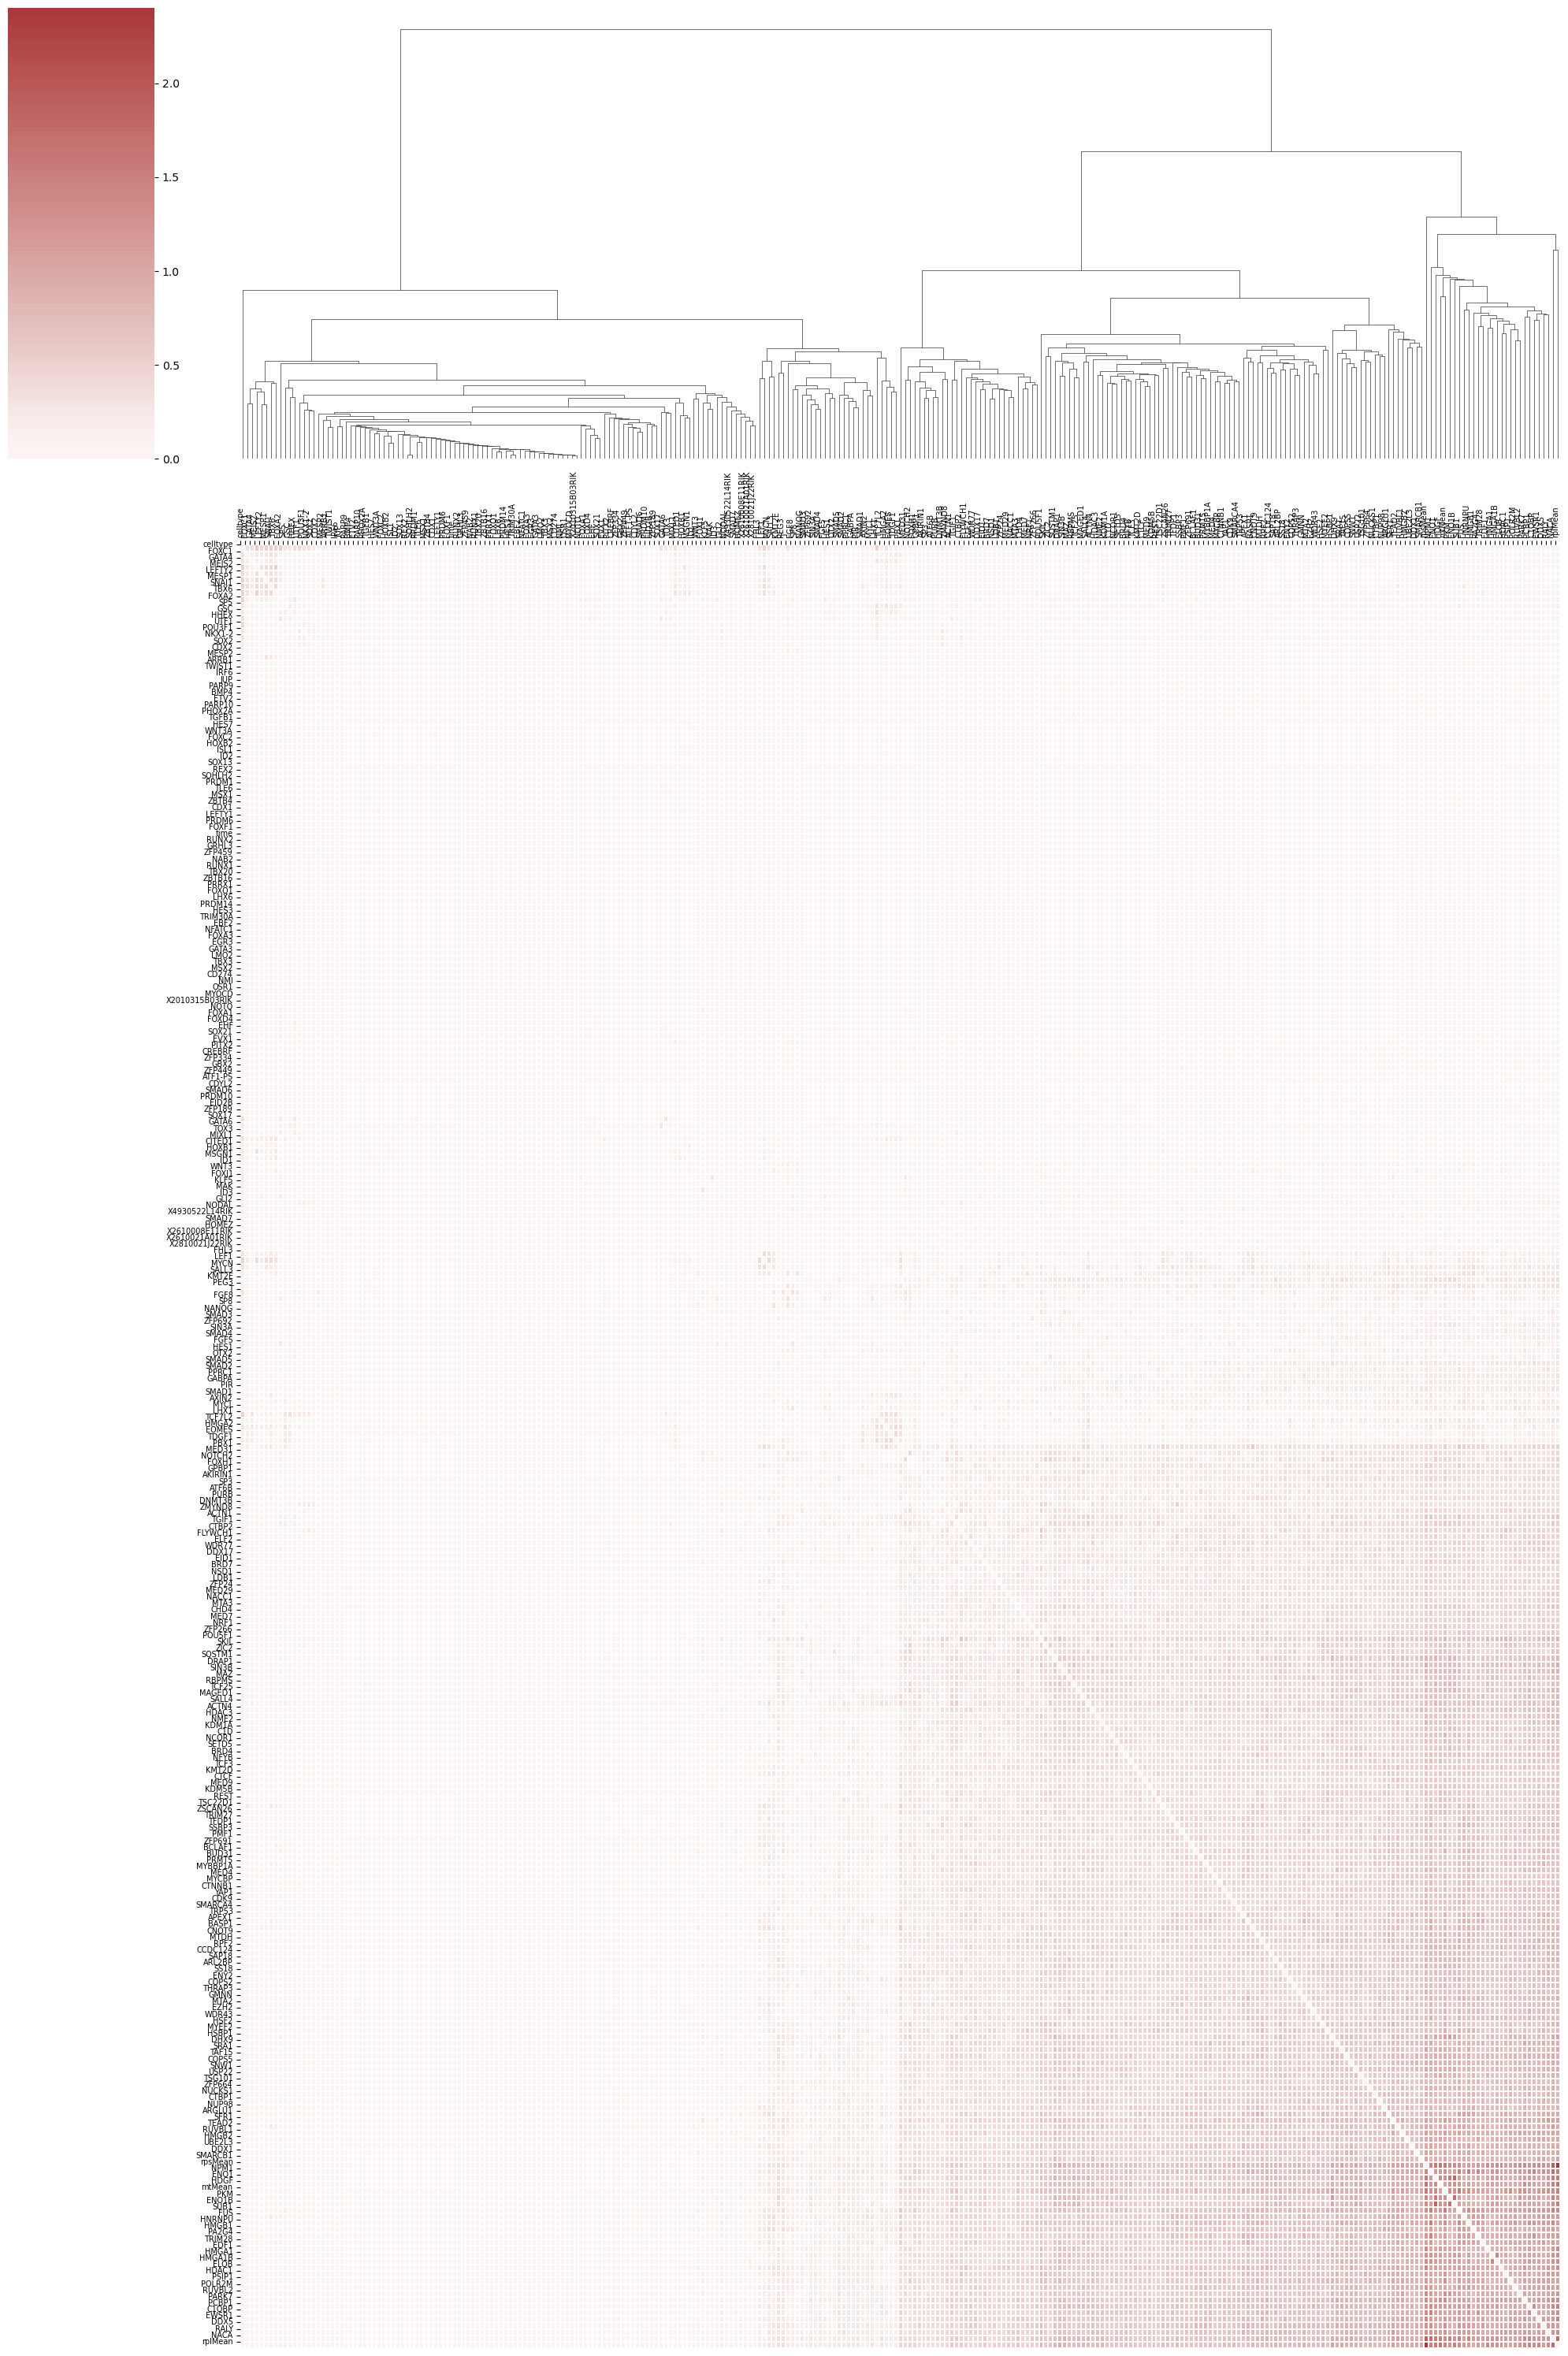

In [8]:
import numpy as np
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(adj_wnt_df, method='average')

# linkage to make sure the clustering was done equially on both axes 
# Symmetry is preserved visually,

g_wnt = sns.clustermap(adj_wnt_df,
                   center=0,
                   row_linkage=linkage,
                   col_linkage=linkage,
                   cmap="vlag",
                   dendrogram_ratio=(0.1, 0.2),
                   linewidths=.1,
                   figsize=(20, 30))

# Move x-axis labels to the top
g_wnt.ax_heatmap.xaxis.set_ticks_position("top")
g_wnt.ax_heatmap.xaxis.set_label_position("top")

# Get all column names from the data (regardless of what gets shown in the plot)
column_names = g_wnt.data2d.columns
row_names = g_wnt.data2d.index

# Set xtick labels manually to ensure all labels are shown
g_wnt.ax_heatmap.set_xticks(np.arange(len(column_names)))  # Ensure every column is listed
g_wnt.ax_heatmap.set_xticklabels(column_names, rotation=90, fontsize=7)

# Set yticks to the row names
g_wnt.ax_heatmap.yaxis.set_label_position("left")
g_wnt.ax_heatmap.yaxis.set_ticks_position("left")

# Set xtick labels manually to ensure all labels are shown
g_wnt.ax_heatmap.set_yticks(np.arange(len(row_names)))  # Ensure every column is listed
g_wnt.ax_heatmap.set_yticklabels(row_names, fontsize=7)

g_wnt.ax_row_dendrogram.remove()

# Optional: Adjust layout for proper spacing
plt.tight_layout()
plt.show()

g_wnt.savefig(output /"wnt_heatmap.png", dpi=300) 



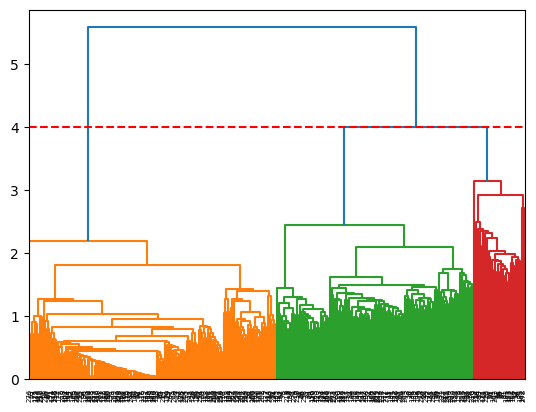

[2 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 2 3 2 1 2 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 3
 2 2 2 1 3 1 1 2 1 2 3 3 3 2 1 1 1 3 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 3 1 1 1
 1 1 1 2 2 1 1 3 2 3 1 1 1 1 3 3 1 3 2 3 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 1 2
 1 1 1 1 1 1 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 1 3 2 1 2 1 2
 1 2 1 1 2 1 3 2 2 2 2 1 1 3 3 1 1 2 3 1 1 1 1 3 2 3 1 2 1 1 1 1 1 2 1 3 2
 3 2 2 1 2 1 1 2 3 1 2 2 2 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2
 2 2 2 3 1 2 1 1 1 2 2 1 1 2 2 1 2 2 1 1 2 3 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1
 1 1 2 1 1 1 2 2 1 1 1 2 2 1 2 2 2 1 3 3 3 1]
Index(['ACTN1', 'ACTN4', 'AKIRIN1', 'APEX1', 'ARGLU1', 'ARL2BP', 'ARRB1',
       'ATF1-PS', 'ATF6B', 'AXIN2',
       ...
       'ZFP691', 'ZFP692', 'ZIC2', 'ZMYND8', 'ZSCAN26', 'celltype', 'mtMean',
       'rplMean', 'rpsMean', 'time'],
      dtype='object', length=281)


1    140
2    112
3     29
Name: count, dtype: int64

In [9]:
linkage=g_wnt.dendrogram_col.linkage
threshold=4
sch.dendrogram(linkage, color_threshold=threshold)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

clusters = sch.fcluster(linkage, threshold, criterion='distance')
print(clusters)
print(adj_wnt_df.columns)
wnt_gene_clusters=pd.Series(clusters,index=adj_wnt_df.columns)
wnt_gene_clusters.value_counts()

- The gene group bottom right (NACA,RALY,FUS,PKM,C1OBP,...) seem to BE PRESENT in BOTH BMP an WNT
- THESE GENES INTERACT WITH EACH OTHER AND HAVE THE HIGHEST pairwise MI info 


In [ ]:
bmp_1=bmp_gene_clusters[bmp_gene_clusters.values==1]


In [130]:
# vann diagram

bmp_1 = bmp_gene_clusters[bmp_gene_clusters.values == 1]
bmp_2 = bmp_gene_clusters[bmp_gene_clusters.values == 2]
bmp_3 = bmp_gene_clusters[bmp_gene_clusters.values == 3]

wnt_1 = wnt_gene_clusters[wnt_gene_clusters.values == 1]
wnt_2 = wnt_gene_clusters[wnt_gene_clusters.values == 2]
wnt_3 = wnt_gene_clusters[wnt_gene_clusters.values == 3]

bmp_1_genes = set(bmp_1.index)
bmp_2_genes = set(bmp_2.index)
bmp_3_genes = set(bmp_3.index)

wnt_1_genes = set(wnt_1.index)
wnt_2_genes = set(wnt_2.index)
wnt_3_genes = set(wnt_3.index)


In [155]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

def plot_gene_venn_diagram(set1, set2, label1='Set 1', label2='Set 2', title='Venn Diagram',size=6):
    """
    Plots a Venn diagram with gene names in each section.

    Parameters:
    - set1: set of genes (e.g. BMP genes)
    - set2: set of genes (e.g. WNT genes)
    - label1: label for set1
    - label2: label for set2
    - title: title for the plot
    """
    only_set1 = set1 - set2
    only_set2 = set2 - set1
    intersection = set1 & set2

    only_set1_str = '\n'.join(sorted(only_set1))
    only_set2_str = '\n'.join(sorted(only_set2))
    intersection_str = '\n'.join(sorted(intersection))

    plt.figure(figsize=(15, 15))
    ven = venn2([set1, set2], set_labels=(label1, label2))

    # Set the labels
    if ven.get_label_by_id('10'):
        ven.get_label_by_id('10').set_text(only_set1_str)
    if ven.get_label_by_id('01'):
        ven.get_label_by_id('01').set_text(only_set2_str)
    if ven.get_label_by_id('11'):
        ven.get_label_by_id('11').set_text(intersection_str)

    # Set smaller font size for all gene labels
    for label in ven.subset_labels:
        if label:
            label.set_fontsize(size)

    plt.title(title)
    plt.tight_layout()
    plt.show()


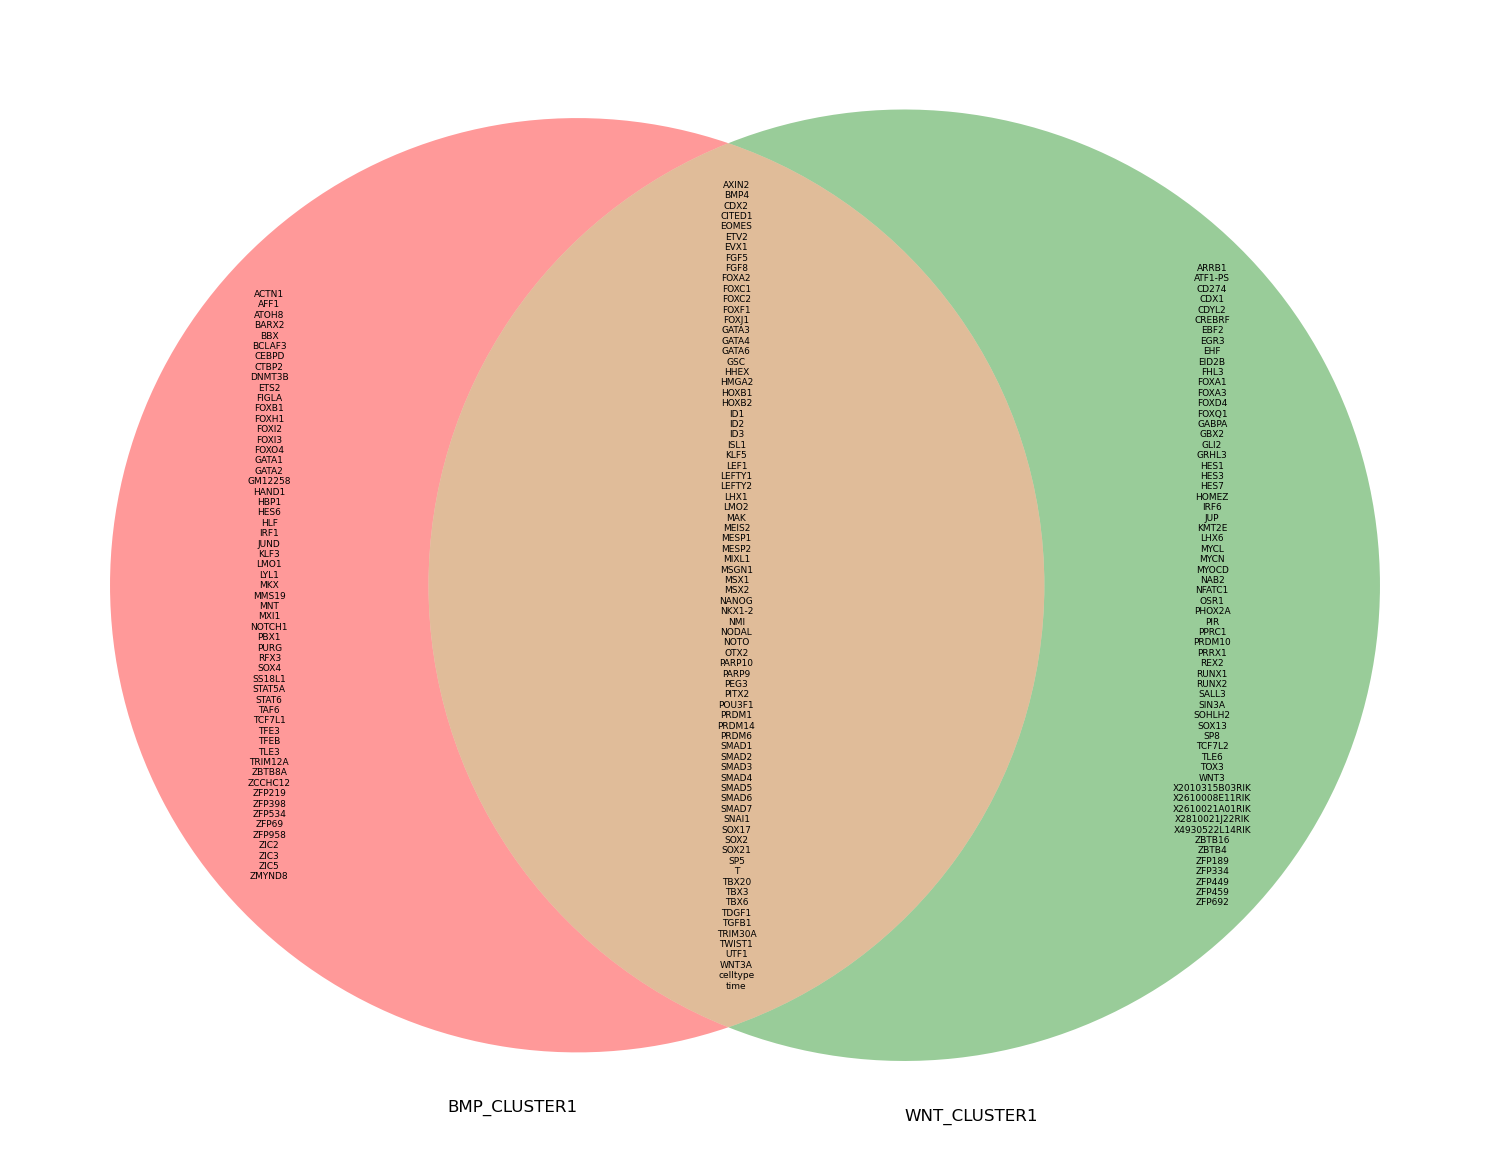

In [158]:
plot_gene_venn_diagram(bmp_1_genes,wnt_1_genes, label1='BMP_CLUSTER1', label2='WNT_CLUSTER1', title='',size=6.5)

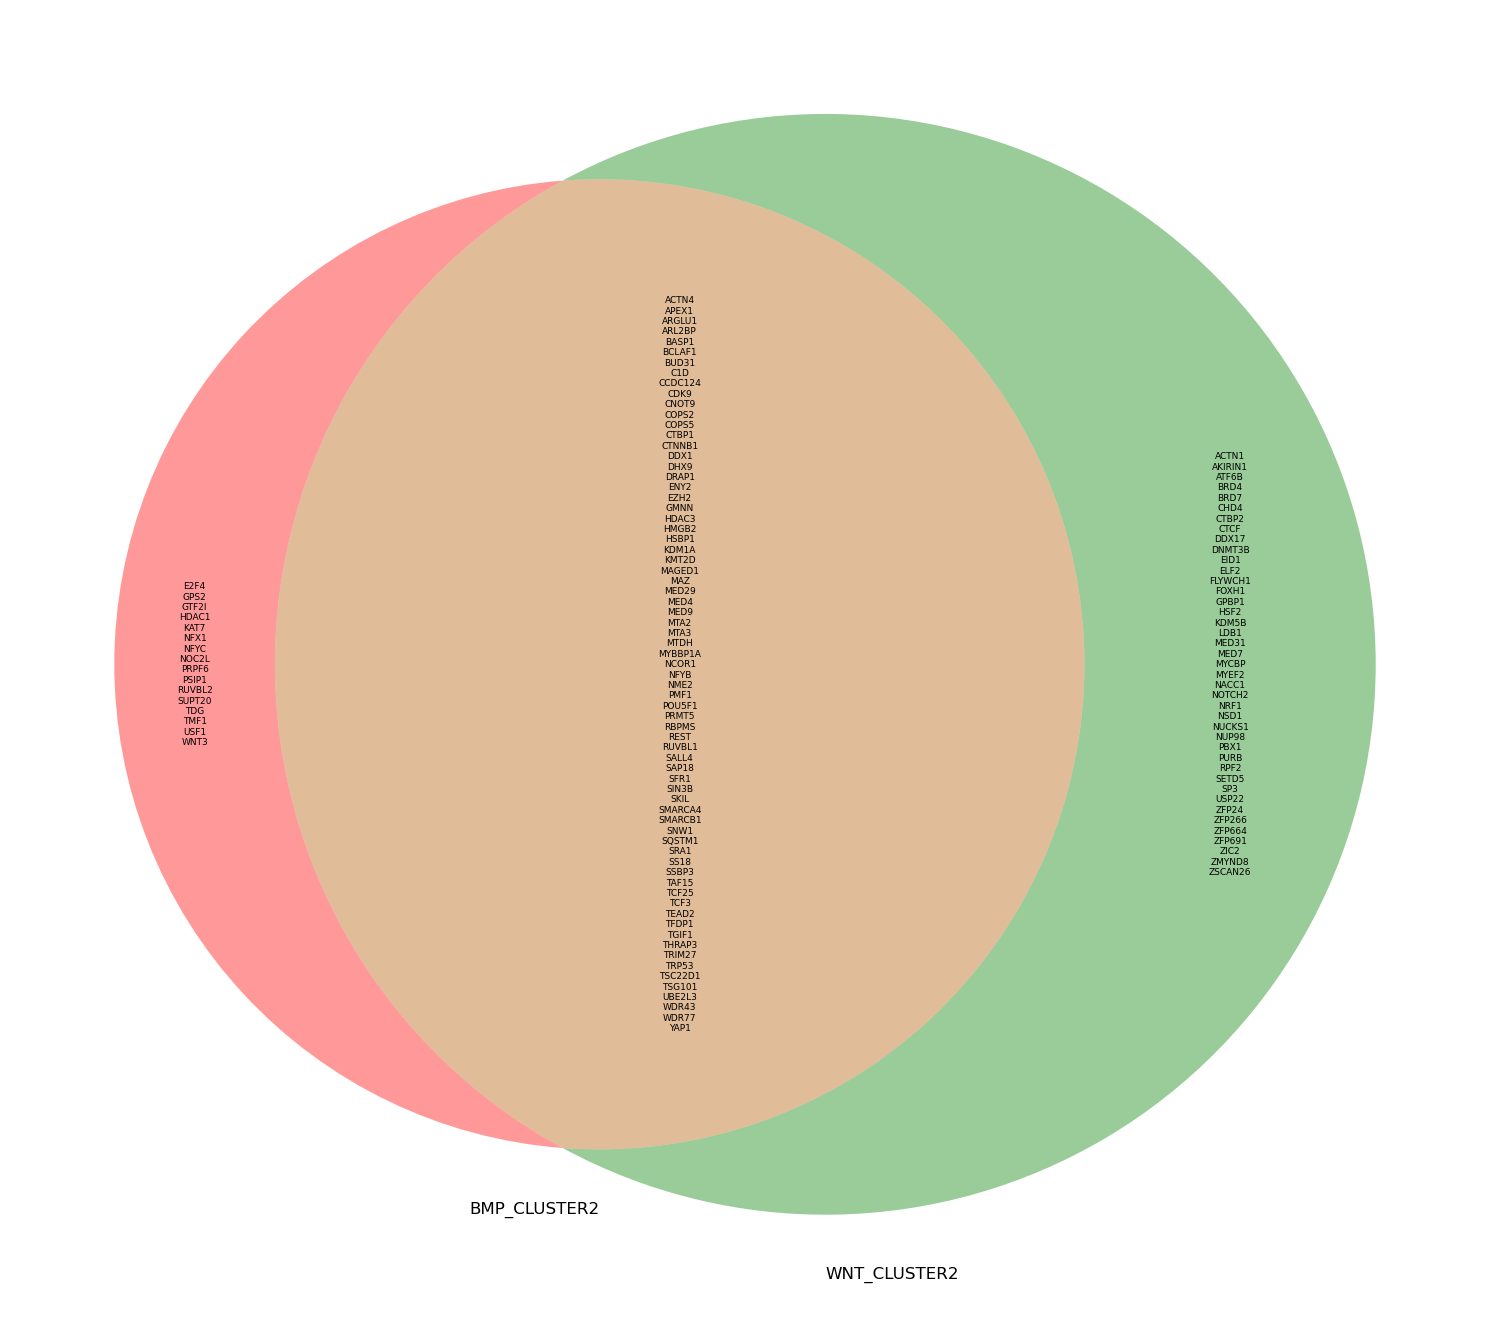

In [159]:
plot_gene_venn_diagram(bmp_2_genes,wnt_2_genes, label1='BMP_CLUSTER2', label2='WNT_CLUSTER2', title='',size=6.5)

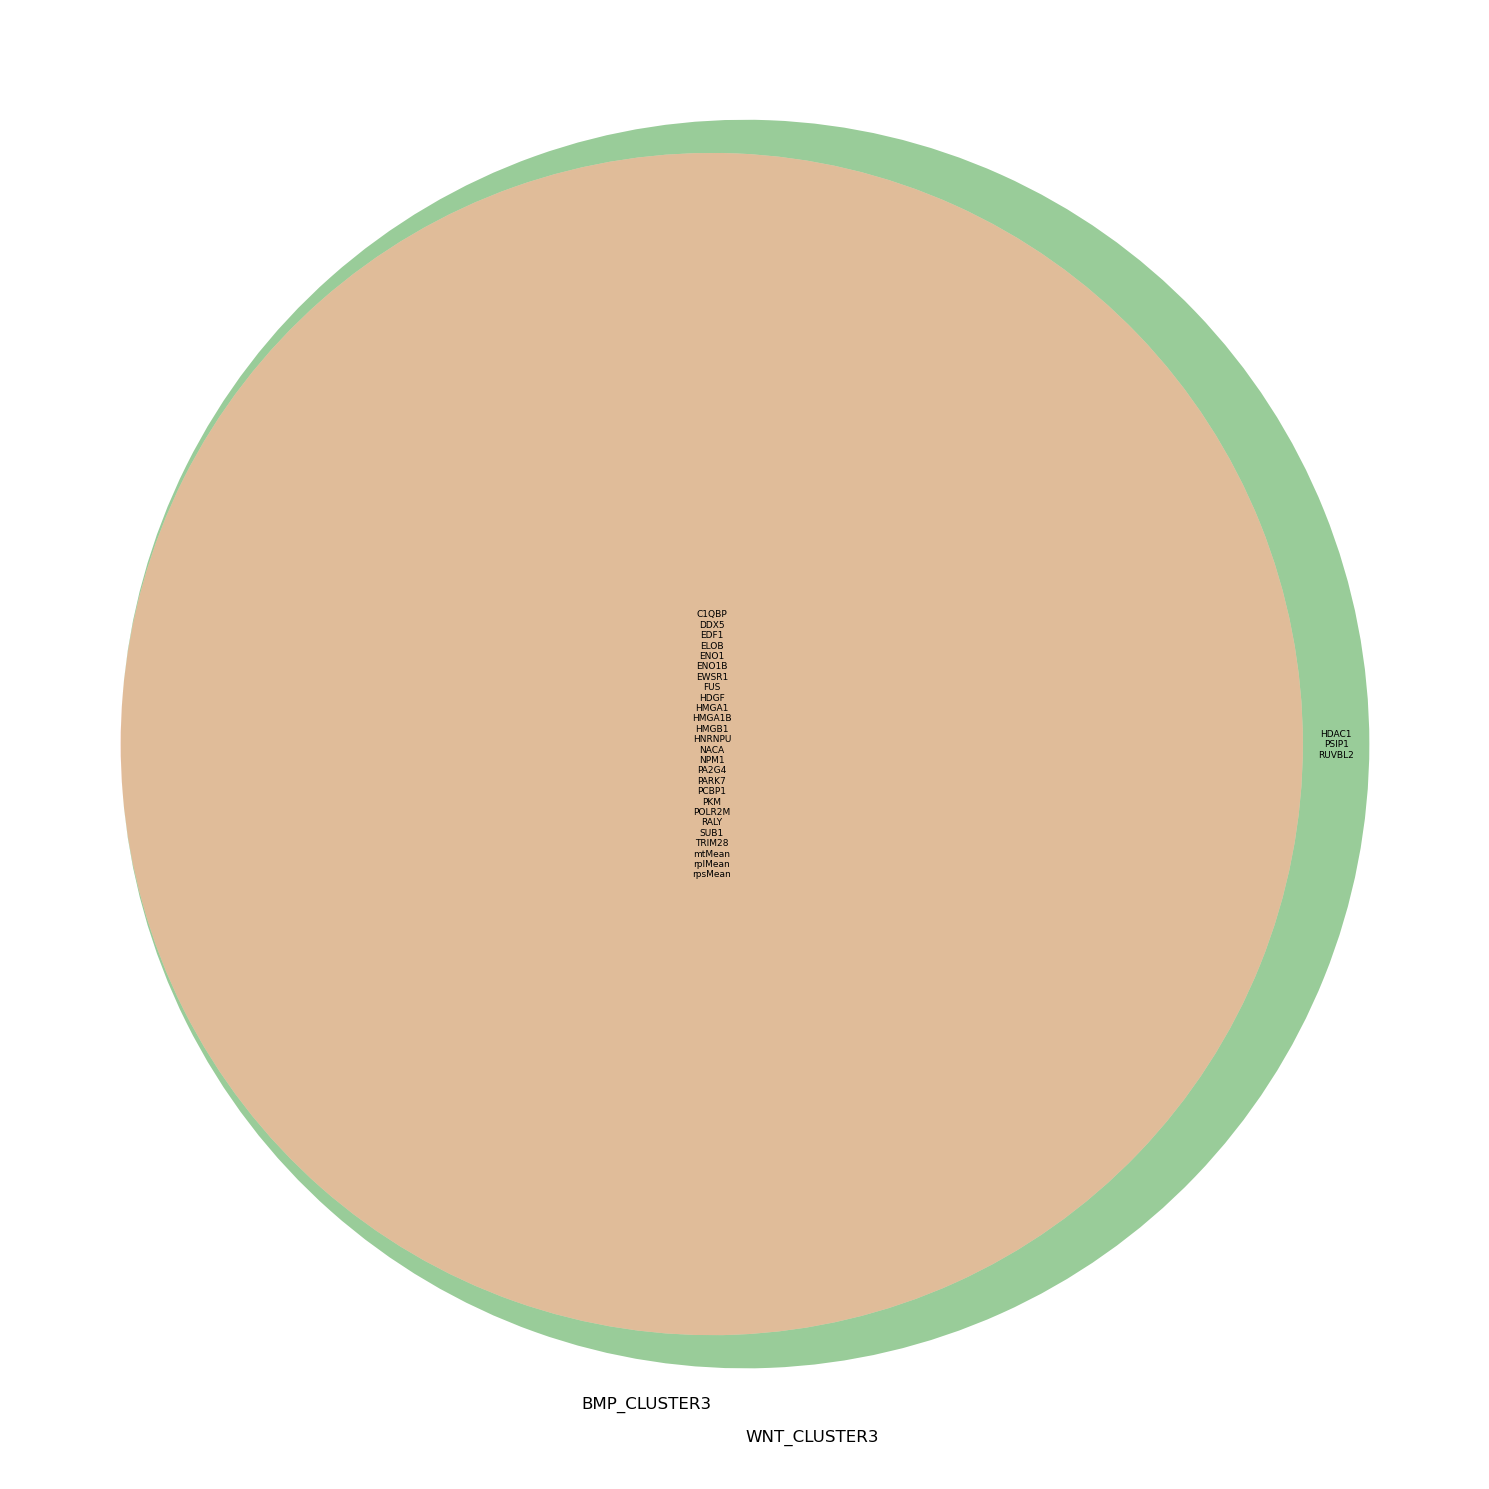

In [160]:
plot_gene_venn_diagram(bmp_3_genes,wnt_3_genes, label1='BMP_CLUSTER3', label2='WNT_CLUSTER3', title='',size=6.5)

In [38]:
edge_intersection_array =(adj_bmp_df_common.values-adj_wnt_df_common.values)
edge_intersection_array

# creating a dataframe from the array
edge_intersection_df = pd.DataFrame(edge_intersection_array, columns=adj_wnt_df_common.columns, index=adj_wnt_df_common.columns)
edge_intersection_df.head()




,ACTN1,ACTN4,APEX1,ARGLU1,ARL2BP,AXIN2,BASP1,BCLAF1,BMP4,BUD31,...,WNT3,WNT3A,YAP1,ZIC2,ZMYND8,celltype,mtMean,rplMean,rpsMean,time
ACTN1,0.000000,-0.143553,0.184481,0.080557,0.069151,-0.032054,0.163484,0.043991,0.060723,0.076540,...,0.160155,0.000000,0.071511,-0.184991,-0.036093,-0.068925,-0.167417,-0.159970,-0.145545,0.000000
ACTN4,-0.143553,0.000000,-0.028376,0.024431,-0.053417,0.212530,0.094769,0.095120,0.000000,0.074864,...,0.297705,0.037403,0.071568,-0.027471,-0.055382,0.000000,0.180052,0.097156,0.096694,0.000000
APEX1,0.184481,-0.028376,0.000000,0.004013,0.096705,0.089467,0.032664,0.144501,0.000000,0.013102,...,0.333482,0.000000,0.060068,-0.216395,-0.107652,0.087620,0.133408,0.167493,0.087348,0.000000
ARGLU1,0.080557,0.024431,0.004013,0.000000,-0.063522,0.119477,0.065517,0.048795,0.000000,-0.065251,...,0.365499,0.000000,-0.013037,-0.239702,-0.098998,-0.067796,-0.093781,-0.214971,-0.262922,0.054752
ARL2BP,0.069151,-0.053417,0.096705,-0.063522,0.000000,0.152515,0.183816,0.194875,0.000000,0.094899,...,0.164348,0.000000,0.042024,-0.152383,-0.140718,0.000000,0.036890,0.041814,-0.008105,0.000000


In [44]:
adj_bmp_df_common.values

array([[0.        , 0.29975675, 0.49188197, ..., 0.47256482, 0.46195269,
        0.        ],
       [0.29975675, 0.        , 0.38330426, ..., 0.79476699, 0.79477528,
        0.        ],
       [0.49188197, 0.38330426, 0.        , ..., 0.87714065, 0.84232025,
        0.        ],
       ...,
       [0.47256482, 0.79476699, 0.87714065, ..., 0.        , 2.36879633,
        0.        ],
       [0.46195269, 0.79477528, 0.84232025, ..., 2.36879633, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

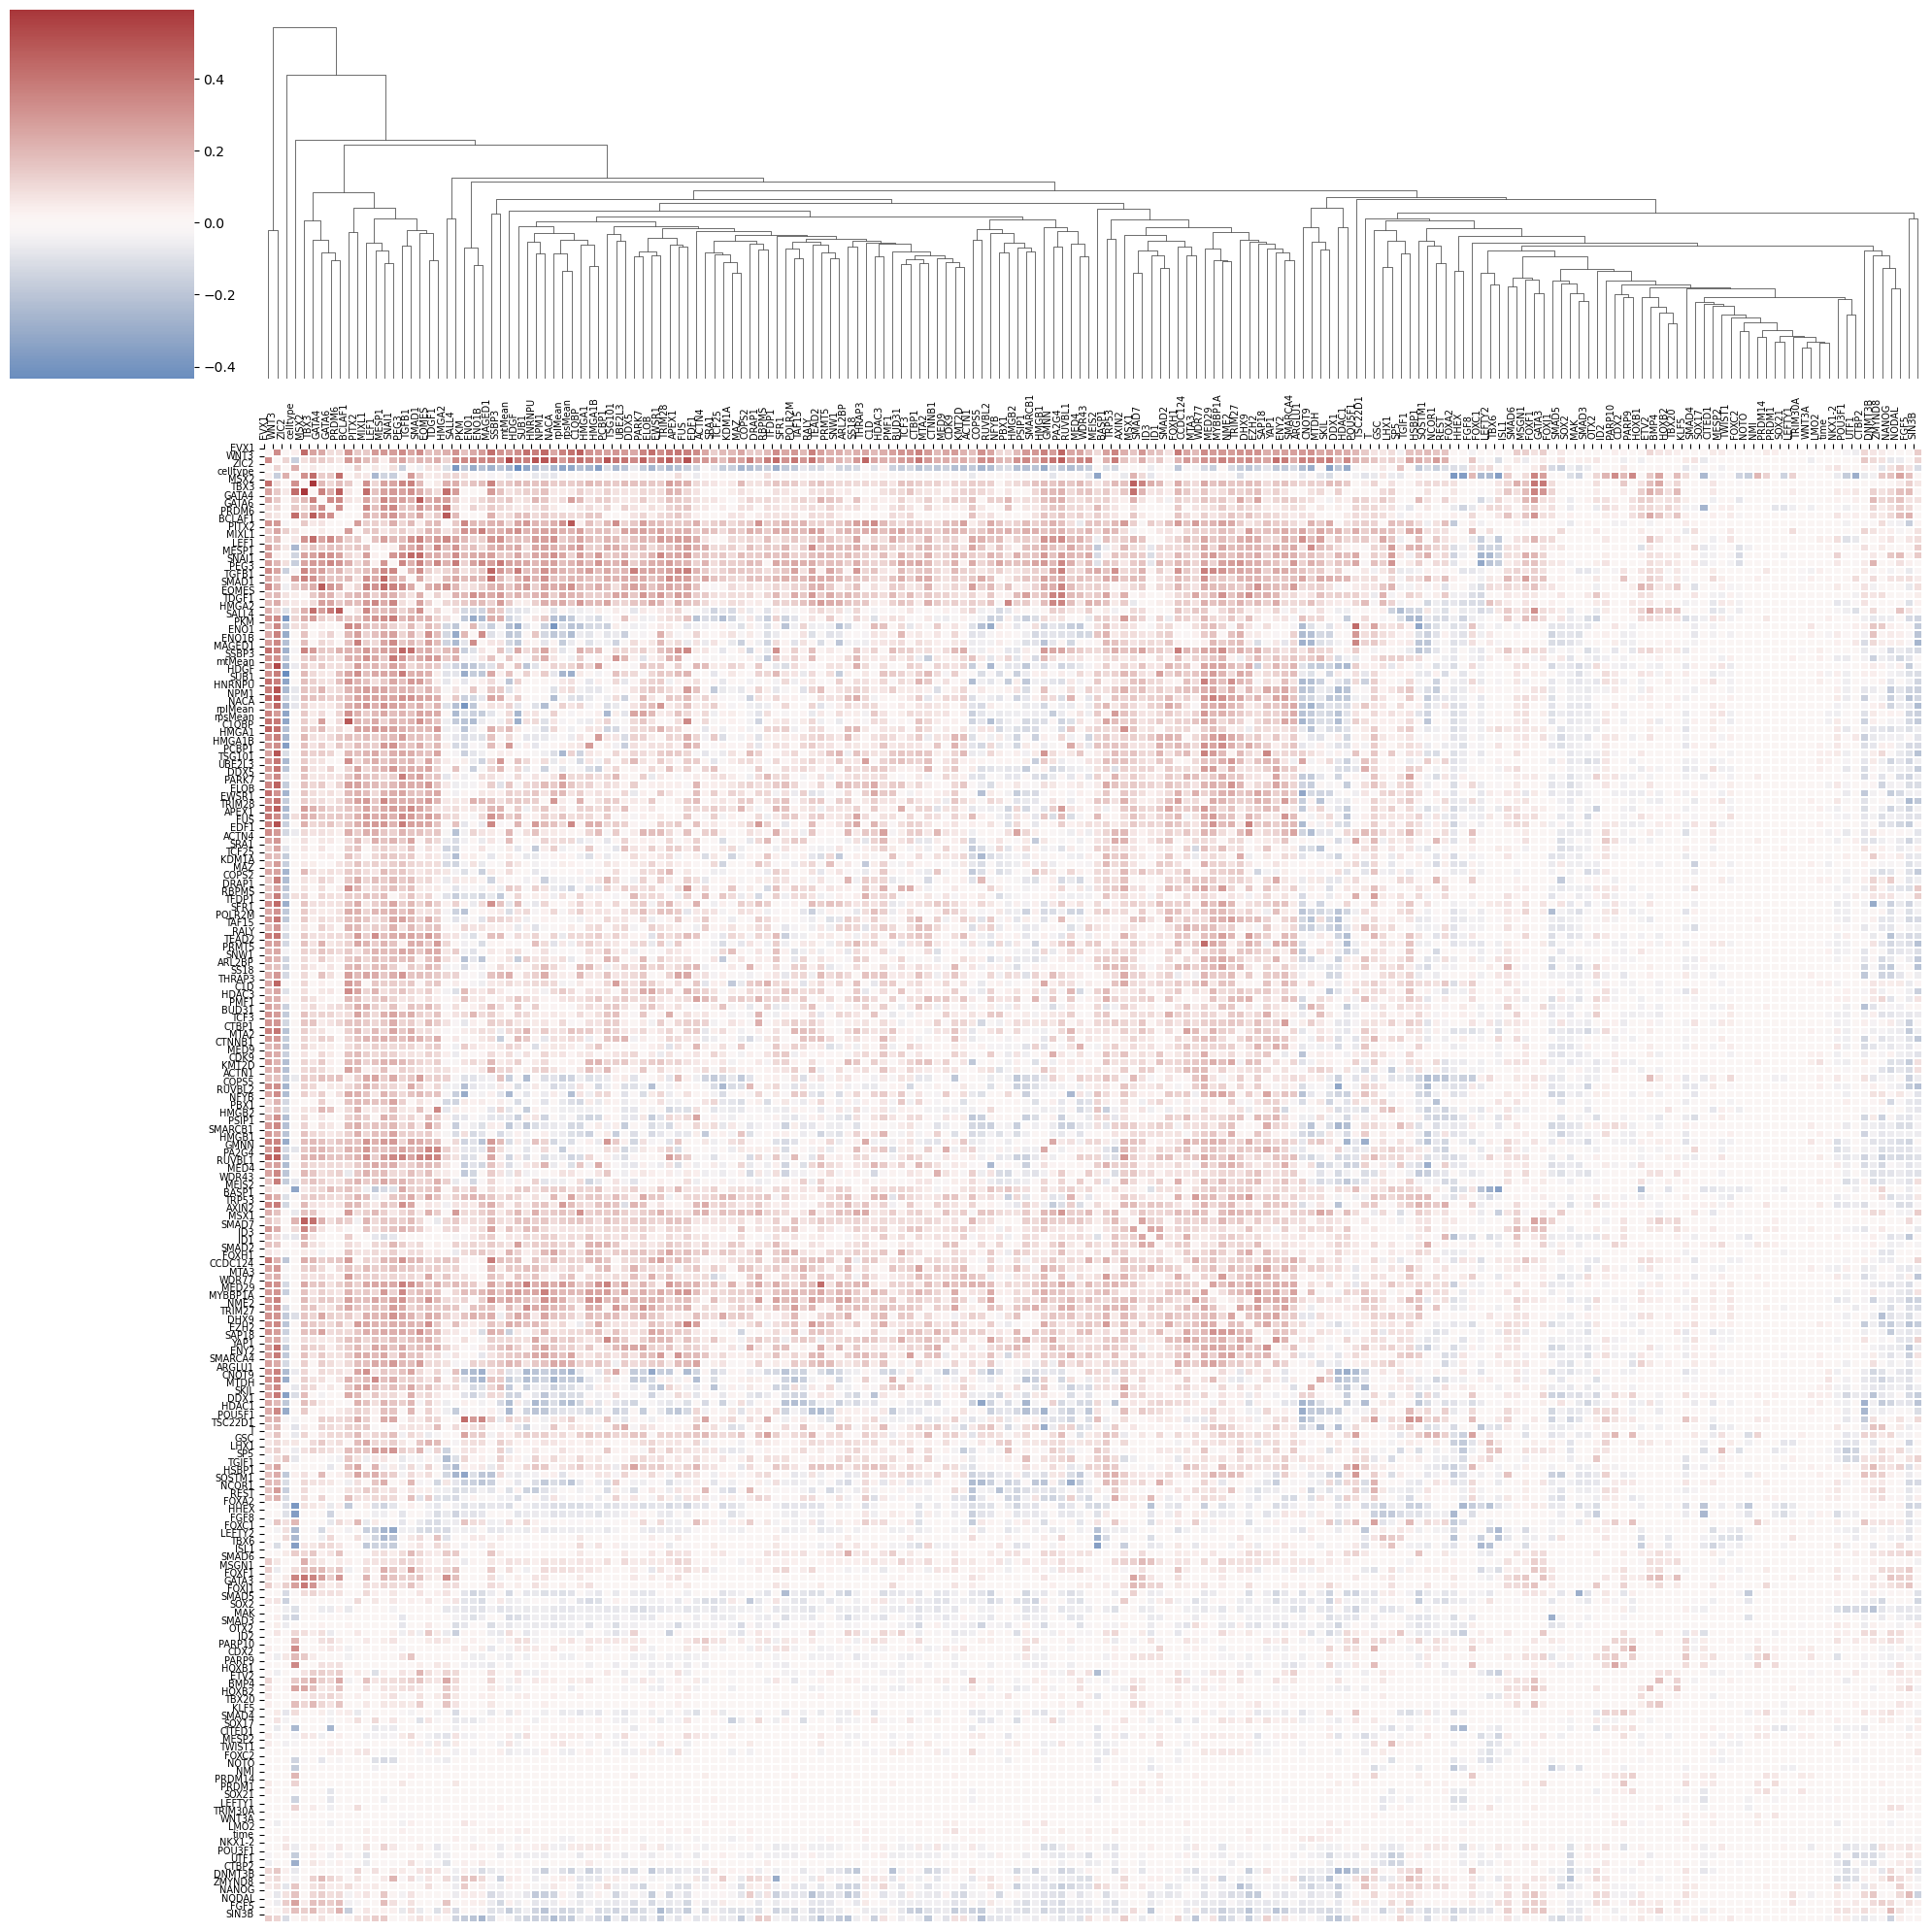

In [72]:
import numpy as np
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(edge_intersection_df, method='average')

# linkage to make sure the clustering was done equially on both axes 
# Symmetry is preserved visually,

g = sns.clustermap(edge_intersection_df,
                   center=0,
                   row_linkage=linkage,
                   col_linkage=linkage,
                   cmap="vlag",
                   dendrogram_ratio=(0.1, 0.2),
                   linewidths=.1,
                   figsize=(20, 20))

# Move x-axis labels to the top
g.ax_heatmap.xaxis.set_ticks_position("top")
g.ax_heatmap.xaxis.set_label_position("top")

# Get all column names from the data (regardless of what gets shown in the plot)
column_names = g.data2d.columns
row_names = g.data2d.index

# Set xtick labels manually to ensure all labels are shown
g.ax_heatmap.set_xticks(np.arange(len(column_names)))  # Ensure every column is listed
g.ax_heatmap.set_xticklabels(column_names, rotation=90, fontsize=7)

# Set yticks to the row names
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.yaxis.set_ticks_position("left")

# Set xtick labels manually to ensure all labels are shown
g.ax_heatmap.set_yticks(np.arange(len(row_names)))  # Ensure every column is listed
g.ax_heatmap.set_yticklabels(row_names, fontsize=7)

g.ax_row_dendrogram.remove()

# Optional: Adjust layout for proper spacing
plt.tight_layout()
plt.show()



In [ ]:
- WNT3 , EVX1  